In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import Word2Vec, FastText
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [4]:
# Charger les fichiers nécessaires
df1 = pd.read_csv('books_dataset.xls', encoding='latin1')
df2 = pd.read_csv('Users.csv', encoding='latin1')
df3 = pd.read_csv('Ratings.csv', encoding='latin1')


In [5]:
# Vérifier le chargement des données
print("Aperçu de books_dataset:")
print(df1.head())
print("Aperçu de Users:")
print(df2.head())
print("Aperçu de Ratings:")
print(df3.head())

Aperçu de books_dataset:
         ISBN              Book-Title       Book-Author  Year-Of-Publication  \
0  0399135782  The Kitchen God's Wife           Amy Tan                 1991   
1  0440234743           The Testament      John Grisham                 1999   
2  0345402871                Airframe  Michael Crichton                 1997   
3  055321215X     Pride and Prejudice       Jane Austen                 1983   
4  055321215X     Pride and Prejudice       Jane Austen                 1983   

          Publisher         categories  \
0  Putnam Pub Group            Fiction   
1              Dell            Fiction   
2  Ballantine Books  Adventure stories   
3            Bantam          Courtship   
4            Bantam            Fiction   

                                         description  
0  Winnie Louie, an aging Chinese woman convinced...  
1  A suicidal billionaire, a burnt-out Washington...  
2  The twin jet plane en route to Denver from Hon...  
3                    

**TF-IDF**

In [6]:
# Préparer les descriptions
corpus = df1['description'].fillna('').tolist()

# Créer une matrice TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Limiter à 500 caractéristiques pour simplifier
X_tfidf = tfidf_vectorizer.fit_transform(corpus)

# Convertir la matrice en DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=[f'tfidf_{i}' for i in range(X_tfidf.shape[1])])

# Ajouter les colonnes TF-IDF au DataFrame principal
data_with_tfidf = pd.concat([df1, tfidf_df], axis=1)

# Vérifier les résultats de TF-IDF
print("Aperçu des colonnes TF-IDF ajoutées:")
print(tfidf_df.head(10))

Aperçu des colonnes TF-IDF ajoutées:
    tfidf_0  tfidf_1  tfidf_2  tfidf_3  tfidf_4  tfidf_5  tfidf_6  tfidf_7  \
0  0.000000      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1  0.000000      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2  0.000000      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3  0.000000      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4  0.000000      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
5  0.000000      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
6  0.000000      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
7  0.207116      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
8  0.000000      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
9  0.000000      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

    tfidf_8   tfidf_9  ...  tfidf_490  tfidf_491  tfidf_492  tfidf_493  \
0  0.000000  0.000000  ...    

**Doc2Vec**

In [7]:
# Préparer les documents étiquetés pour Doc2Vec
tagged_data = [TaggedDocument(words=desc.split(), tags=[str(i)]) for i, desc in enumerate(corpus)]

# Entraîner le modèle Doc2Vec
print("Entraînement du modèle Doc2Vec...")
model_doc2vec = Doc2Vec(tagged_data, vector_size=50, window=2, min_count=1, workers=4, epochs=20)
print("Modèle Doc2Vec entraîné.")

# Générer les vecteurs Doc2Vec pour chaque description
doc2vec_vectors = [model_doc2vec.infer_vector(desc.split()) for desc in corpus]

doc2vec_df = pd.DataFrame(doc2vec_vectors, columns=[f'doc2vec_{i}' for i in range(model_doc2vec.vector_size)])

# Ajouter les colonnes Doc2Vec au DataFrame principal
data_with_embeddings = pd.concat([data_with_tfidf, doc2vec_df], axis=1)

# Vérifier les résultats de Doc2Vec
print("Aperçu des colonnes Doc2Vec ajoutées:")
print(doc2vec_df.head())

Entraînement du modèle Doc2Vec...
Modèle Doc2Vec entraîné.
Aperçu des colonnes Doc2Vec ajoutées:
   doc2vec_0  doc2vec_1  doc2vec_2  doc2vec_3  doc2vec_4  doc2vec_5  \
0  -0.044314  -0.050534   0.366468   0.392830   0.003271  -0.072489   
1   0.045045   0.077321  -0.174936   0.021220  -0.061685  -0.106047   
2  -0.057131   0.062136   0.107361   0.366465  -0.120729  -0.024328   
3  -0.039698   0.062455   0.026420   0.043241  -0.073373  -0.066168   
4  -0.130742  -0.012371   0.200508   0.113009  -0.091640  -0.051409   

   doc2vec_6  doc2vec_7  doc2vec_8  doc2vec_9  ...  doc2vec_40  doc2vec_41  \
0   0.098632   0.057312  -0.782289  -0.030342  ...    0.478988    0.078786   
1   0.201656   0.210108  -0.475124  -0.029782  ...    0.253781    0.047122   
2   0.488014   0.132812  -0.736575  -0.241773  ...    0.111023    0.256204   
3  -0.012051   0.084251  -0.062060   0.034611  ...    0.060381    0.021082   
4   0.146423   0.173089  -0.444603   0.074570  ...    0.231341    0.075696   

   doc2

**Word2Vec**

In [9]:
# Préparer les données pour Word2Vec
sentences = [desc.split() for desc in corpus]

# Entraîner le modèle Word2Vec
print("Entraînement du modèle Word2Vec...")
model_word2vec = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=4, sg=0, epochs=20)
print("Modèle Word2Vec entraîné.")

# Générer un exemple de vecteur Word2Vec pour un mot
test_word = "book"
if test_word in model_word2vec.wv:
    print(f"Vecteur Word2Vec pour le mot '{test_word}':")
    print(model_word2vec.wv[test_word])
else:
    print(f"Le mot '{test_word}' n'est pas dans le vocabulaire de Word2Vec.")

Entraînement du modèle Word2Vec...
Modèle Word2Vec entraîné.
Vecteur Word2Vec pour le mot 'book':
[ 0.77488464  2.3383205  -0.86625004 -0.2554485   4.526066   -4.374615
  6.1373153   0.92641336  1.9367585  -2.4649658   4.373599   -1.6461433
 -0.5980991   3.1191294  -2.167065   -0.67085445 -2.6462288  -0.29210976
 -1.6089144   2.738327    0.76209825  2.0570467  -3.3412862  -0.9014709
 -0.20287363 -2.7822483   3.0388765  -2.8964303  -1.459388   -1.0724913
 -0.19836944 -3.3817232  -0.9152466   0.8008139   0.11735716  6.649806
  3.4166894   1.6835113   1.2499821   1.3685486   1.2017232  -2.583174
  1.7676398  -0.49524453 -4.6198964  -0.09964908  0.85004365 -2.3238564
  3.9345217   3.3473232 ]


**FastText**

In [10]:
# Entraîner le modèle FastText
print("Entraînement du modèle FastText...")
model_fasttext = FastText(sentences, vector_size=50, window=5, min_count=1, workers=4, sg=0, epochs=20)
print("Modèle FastText entraîné.")

# Générer un exemple de vecteur FastText pour un mot
if test_word in model_fasttext.wv:
    print(f"Vecteur FastText pour le mot '{test_word}':")
    print(model_fasttext.wv[test_word])
else:
    print(f"Le mot '{test_word}' n'est pas dans le vocabulaire de FastText.")

Entraînement du modèle FastText...
Modèle FastText entraîné.
Vecteur FastText pour le mot 'book':
[ 4.04071     4.934165    0.69744796 -5.990405    1.7285507  -1.5481163
 -0.33183756  4.9215555   1.551304    0.2536702   1.3117086   0.08220448
 -8.042444    5.4964085  -0.43564415 -1.0086669   3.832771   -0.1622733
  3.6218772   4.429444    1.6300006  -1.059216   -6.0439086   7.740221
  0.32880333  2.668431    1.6903073  -2.0096133   5.627647   -4.398189
  2.2852545   3.585108    1.6164457  -4.530241   -0.15819958 -1.9757671
 -1.663834    1.6099092   7.0162      4.641101    1.8092266  -1.232172
  2.2266595   0.17126681 -1.7192578  -2.6144335  -5.64929     3.0821006
  1.3532516   6.127954  ]


**Visualisation**

Visualisation des relations sémantiques avec PCA pour Word2Vec...


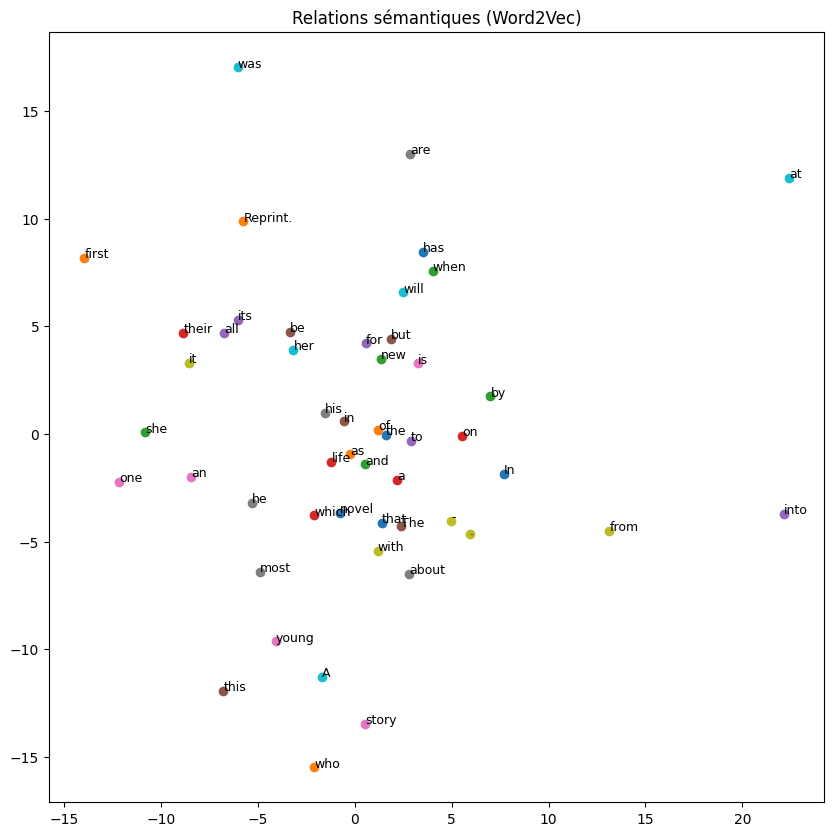

Visualisation des relations sémantiques avec PCA pour FastText...


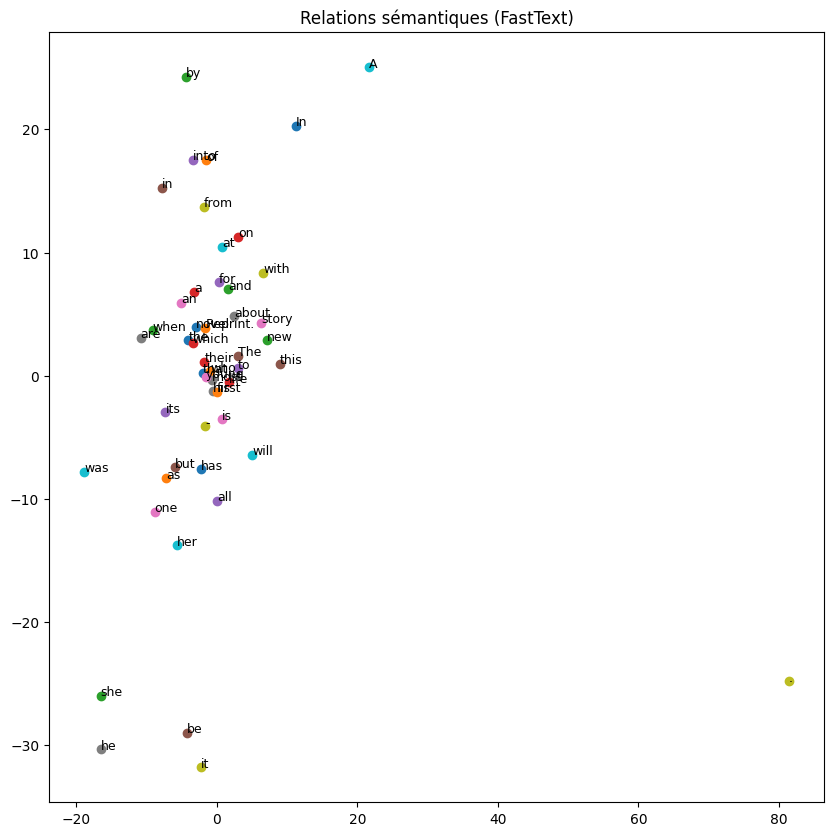

In [11]:
print("Visualisation des relations sémantiques avec PCA pour Word2Vec...")
words = list(model_word2vec.wv.index_to_key)[:50]
word_vectors = model_word2vec.wv[words]
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.text(word_vectors_2d[i, 0] + 0.01, word_vectors_2d[i, 1] + 0.01, word, fontsize=9)
plt.title("Relations sémantiques (Word2Vec)")
plt.show()

print("Visualisation des relations sémantiques avec PCA pour FastText...")
words_ft = list(model_fasttext.wv.index_to_key)[:50]
word_vectors_ft = model_fasttext.wv[words_ft]
word_vectors_ft_2d = pca.fit_transform(word_vectors_ft)

plt.figure(figsize=(10, 10))
for i, word in enumerate(words_ft):
    plt.scatter(word_vectors_ft_2d[i, 0], word_vectors_ft_2d[i, 1])
    plt.text(word_vectors_ft_2d[i, 0] + 0.01, word_vectors_ft_2d[i, 1] + 0.01, word, fontsize=9)
plt.title("Relations sémantiques (FastText)")
plt.show()


**Comparaison des méthodes de vectorisation**

In [12]:

# Calcul de la similarité moyenne des descriptions entre toutes les paires pour chaque méthode
def compute_mean_similarity(vectors, method_name):
    similarities = cosine_similarity(vectors)
    mean_similarity = similarities.mean()
    print(f"Similarité moyenne pour {method_name}: {mean_similarity:.4f}")
    return mean_similarity


In [13]:
# TF-IDF
mean_tfidf = compute_mean_similarity(X_tfidf.toarray(), "TF-IDF")

# Doc2Vec
mean_doc2vec = compute_mean_similarity(doc2vec_df.to_numpy(), "Doc2Vec")

# Word2Vec
word2vec_vectors = [model_word2vec.wv[desc.split()].mean(axis=0) for desc in corpus if desc.split()]
mean_word2vec = compute_mean_similarity(word2vec_vectors, "Word2Vec")

# FastText
fasttext_vectors = [model_fasttext.wv[desc.split()].mean(axis=0) for desc in corpus if desc.split()]
mean_fasttext = compute_mean_similarity(fasttext_vectors, "FastText")

# Identifier la meilleure méthode
best_method = max(
    [("TF-IDF", mean_tfidf), ("Doc2Vec", mean_doc2vec), ("Word2Vec", mean_word2vec), ("FastText", mean_fasttext)],
    key=lambda x: x[1]
)
print(f"La meilleure méthode est {best_method[0]} avec une similarité moyenne de {best_method[1]:.4f}.")

Similarité moyenne pour TF-IDF: 0.1225
Similarité moyenne pour Doc2Vec: 0.4968
Similarité moyenne pour Word2Vec: 0.5896
Similarité moyenne pour FastText: 0.5476
La meilleure méthode est Word2Vec avec une similarité moyenne de 0.5896.


**Sauvegarde**

In [14]:
# Sauvegarde finale
data_with_embeddings = pd.concat([df1, tfidf_df, doc2vec_df], axis=1)
data_with_embeddings.to_csv('books_with_embeddings.csv', index=False)
print("Toutes les données vectorisées sauvegardées dans 'books_with_embeddings.csv'.")


Toutes les données vectorisées sauvegardées dans 'books_with_embeddings.csv'.
